# Introduction

This is a health insurance charges prediction model that uses a linear regression algorithm to predict the health insurance charges of a person based on the given data.

- This dataset contains detailed information about insurance customers, including their age, sex, body mass index (BMI), number of children, smoking status and region. Having access to such valuable insights allows analysts to get a better view into customer behaviour and the factors that contribute to their insurance charges. By understanding the patterns in this data set we can gain useful insight into how age,gender and lifestyle choices can affect a person's insurance premiums.
- This could be of great value when setting up an insurance plan or marketing campaigns that target certain demographics. Furthermore, this dataset provides us with an opportunity to explore deeper questions such as what are some possible solutions for increasing affordability when it comes to dealing with high charges for certain groups?
# It contains:

- Column name       	        Description
- Age               	        The age of the customer. (Integer)
- Children          	        The number of children the customer has. (Integer)
- Smoker            	        Whether or not the customer is a smoker. (Boolean)
- Region            	        The region the customer lives in. (String)
- Charges           	         The insurance charges for the customer. (Float)

# Step 1: Import The key Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-insurance-chargeshealth/insurance.csv


In [2]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/colab/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Step 2: Read the DataSet

In [6]:
pofic = pd.read_csv('/kaggle/input/prediction-of-insurance-chargeshealth/insurance.csv')
print("Full train dataset shape is {}".format(pofic.shape))

Full train dataset shape is (1338, 8)


# Step 3. Basic Data View / Exploration

In [7]:
pofic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


# observation:
- we could understand that here there is no missing values exists in this dataset

In [8]:
pofic.dtypes

index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
pofic.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
pofic.sample(10)

,index,age,sex,bmi,children,smoker,region,charges
158,158,30,male,35.530,0,yes,southeast,36950.25670
948,948,42,male,31.255,0,no,northwest,6358.77645
382,382,55,male,33.000,0,no,southeast,20781.48892
680,680,21,female,17.400,1,no,southwest,2585.26900
578,578,52,male,30.200,1,no,southwest,9724.53000
1175,1175,22,female,27.100,0,no,southwest,2154.36100
30,30,22,male,35.600,0,yes,southwest,35585.57600
1176,1176,52,female,24.130,1,yes,northwest,23887.66270
1269,1269,45,male,27.500,3,no,southwest,8615.30000
943,943,19,male,22.610,0,no,northwest,1628.47090


In [11]:
print("\n Dataset.columns")
print(pofic.columns)


 Dataset.columns
Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')


In [12]:
pofic.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# Find the percentage of missing values 
pofic.isnull().sum()/pofic.shape[0]*100

index       0.0
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [14]:
# Finding the duplicates
pofic.duplicated().sum()

0

In [15]:
# identifying the garbage values
for i in pofic.select_dtypes(include="object").columns:
    print(pofic[i].value_counts())
    print("***"*10)

sex
male      676
female    662
Name: count, dtype: int64
******************************
smoker
no     1064
yes     274
Name: count, dtype: int64
******************************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
******************************


# Step 4: Data preprocessing - clean
1. Missing value handling is not required
2. drop unwanted

# observation
# 1. Find the Descriptive Statistics:
2. Calculate mean, median, and standard deviation of severity levels.

In [16]:
print("\nDataset Descriptive Statistics:")
print(pofic.describe())


Dataset Descriptive Statistics:
             index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010


#  Step 5: EDA (Explorative Data Analytics)
- Conduct exploratory data analysis (EDA) to understand the dataset’s structure and identify key patterns and correlations.

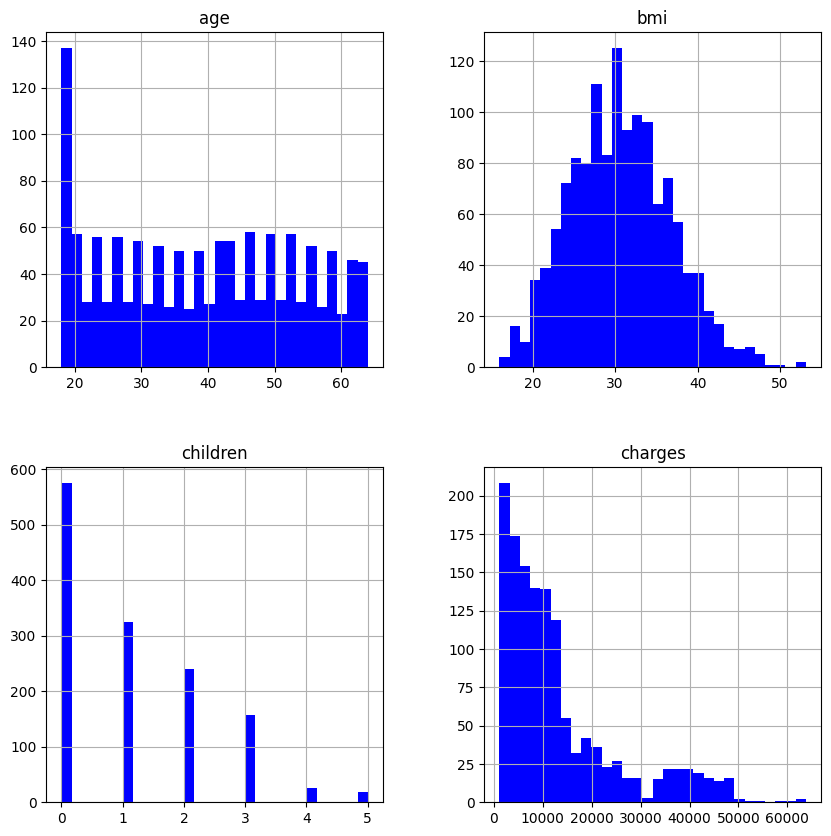

In [17]:
pofic[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

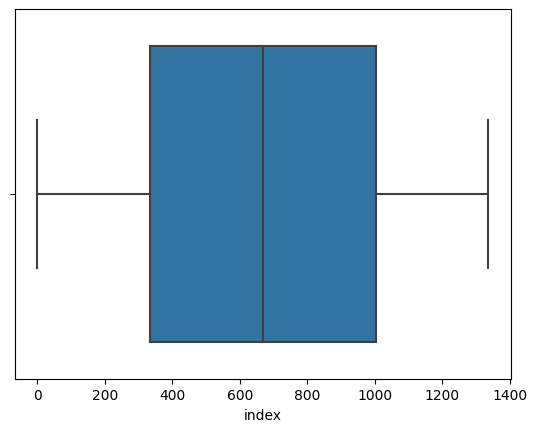

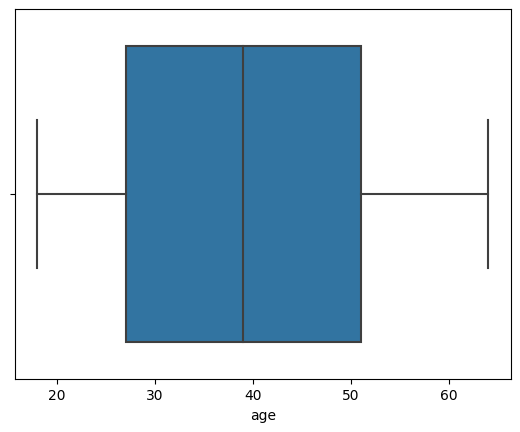

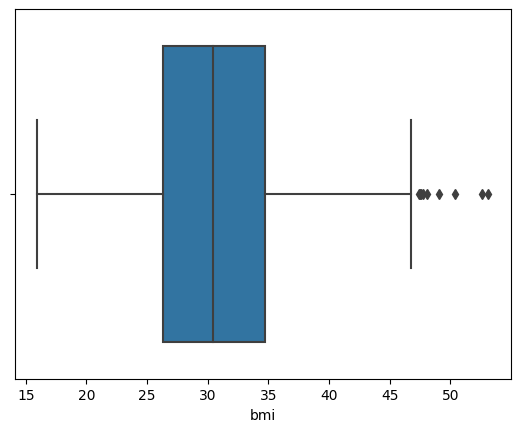

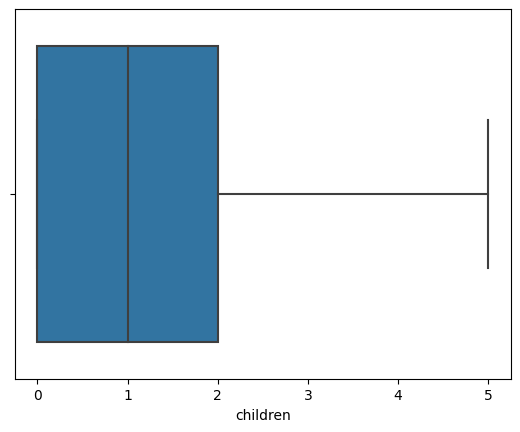

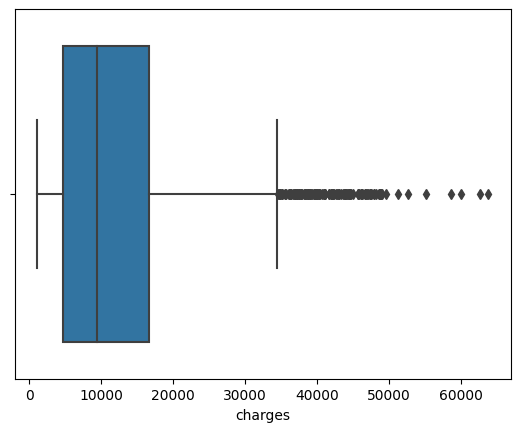

In [18]:
# Box plot
for i in pofic.select_dtypes(include="number").columns:
    import warnings
    warnings.filterwarnings("ignore")
    sns.boxplot(data=pofic,x=i)
    plt.show()

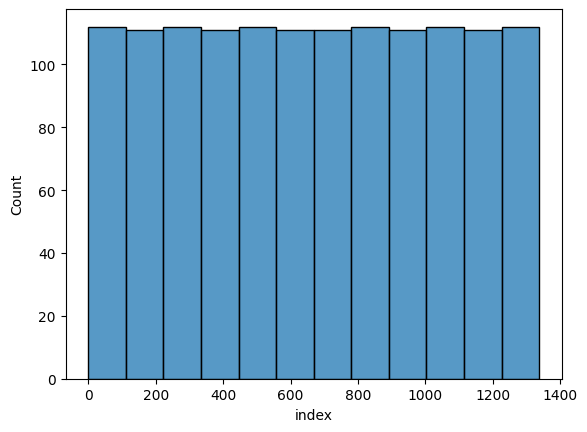

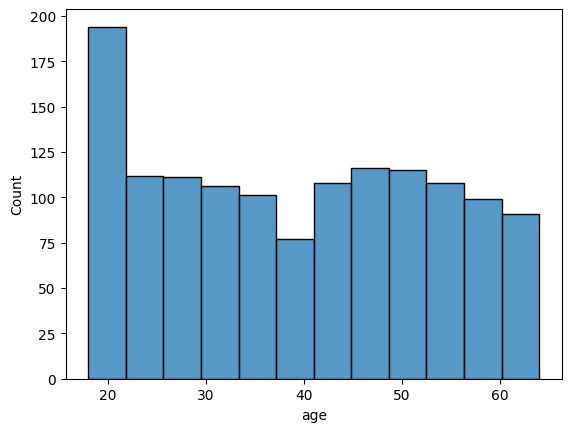

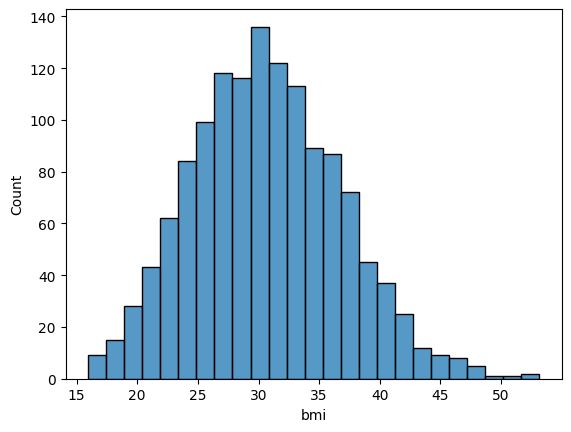

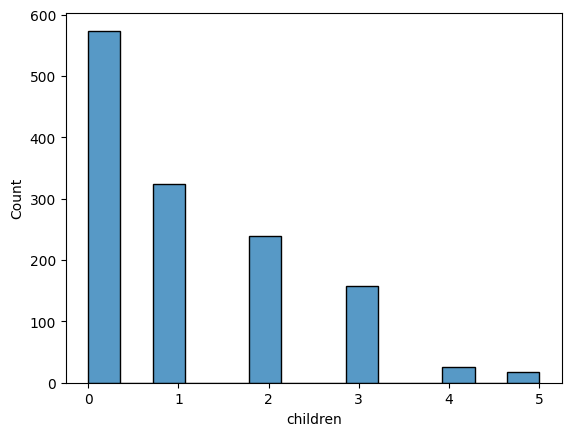

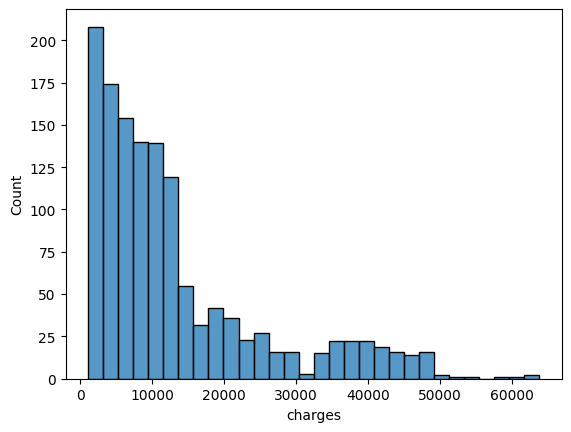

In [19]:
# Histogram to understand the distribution 
for i in pofic.select_dtypes(include="number").columns:
    import warnings
    warnings.filterwarnings("ignore")
    sns.histplot(data=pofic,x=i)
    plt.show()

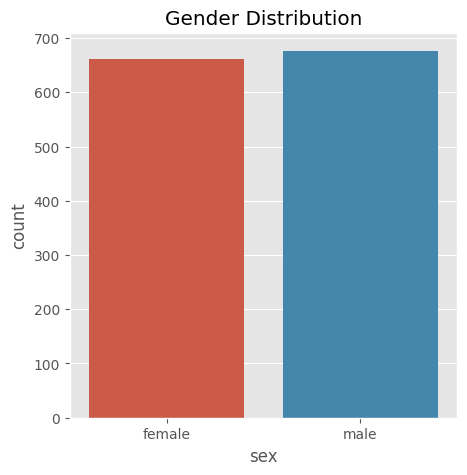

In [20]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=pofic)
plt.title('Gender Distribution')
plt.show()

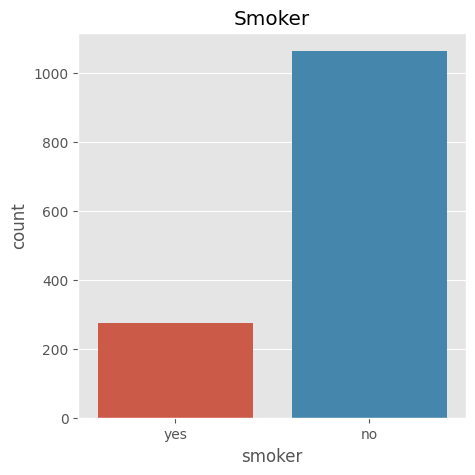

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=pofic)
plt.title('Smoker')
plt.show()

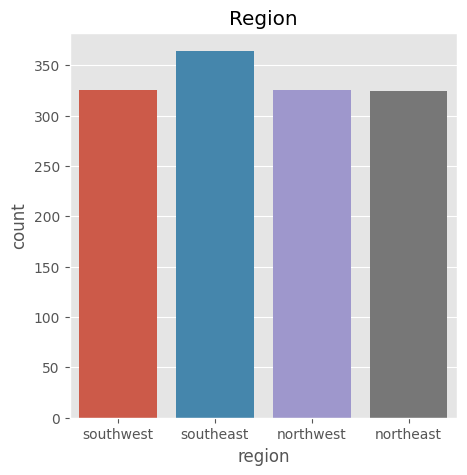

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=pofic)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

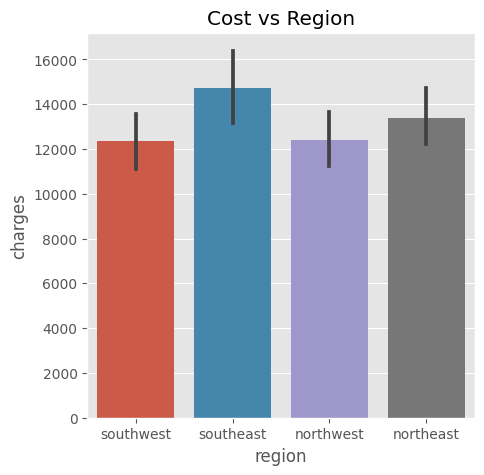

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=pofic)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

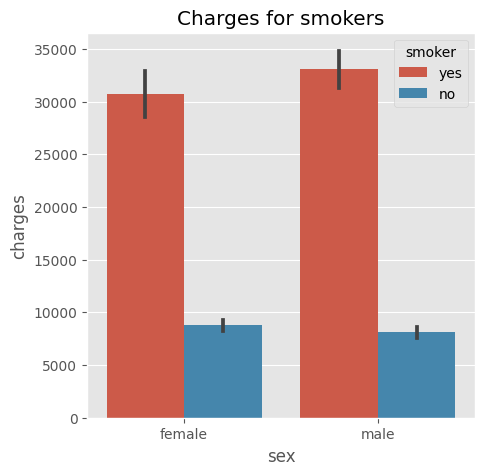

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=pofic)
plt.title('Charges for smokers')

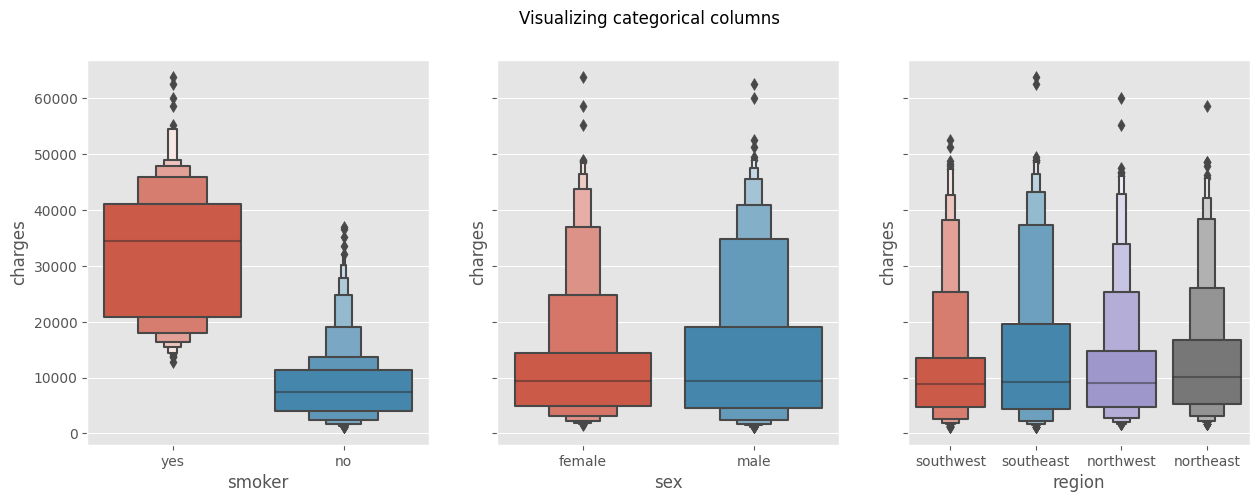

In [25]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=pofic, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=pofic, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=pofic, ax=axes[2])
import warnings
warnings.filterwarnings("ignore")


In [26]:
pofic.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
pofic['sex'] = pofic['sex'].apply({'male':0, 'female':1}.get)
pofic['smoker'] = pofic['smoker'].apply({'yes':1, 'no':0}.get)
pofic['region'] = pofic['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [28]:
pofic.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,1,27.900,0,1,1,16884.92400
1,1,18,0,33.770,1,0,2,1725.55230
2,2,28,0,33.000,3,0,2,4449.46200
3,3,33,0,22.705,0,0,3,21984.47061
4,4,32,0,28.880,0,0,3,3866.85520


# Correlation

In [29]:
pofic.charges.corr(pofic.age)

0.2990081933306476

In [30]:
pofic.charges.corr(pofic.bmi)

0.19834096883362895

In [31]:
pofic.children.corr(pofic.charges)

0.0679982268479048

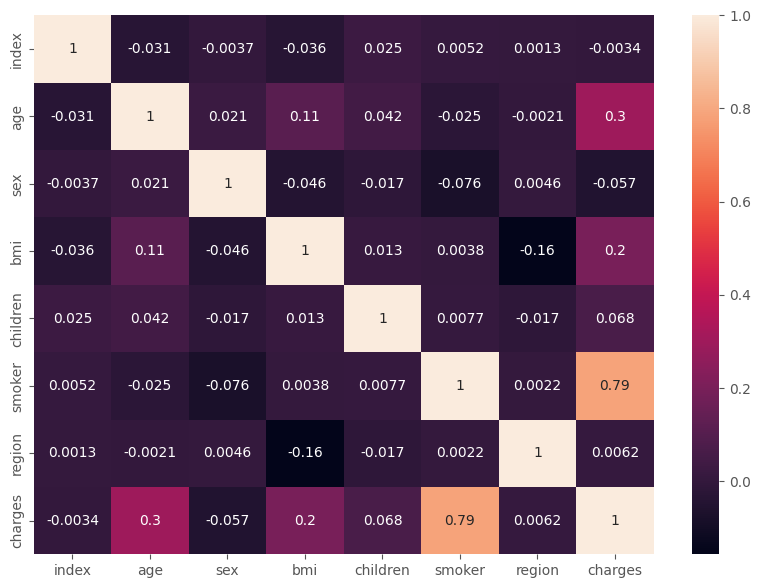

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(pofic.corr(), annot = True)
plt.show()

In [33]:
p=pofic.select_dtypes(include="number").corr()

<Axes: >

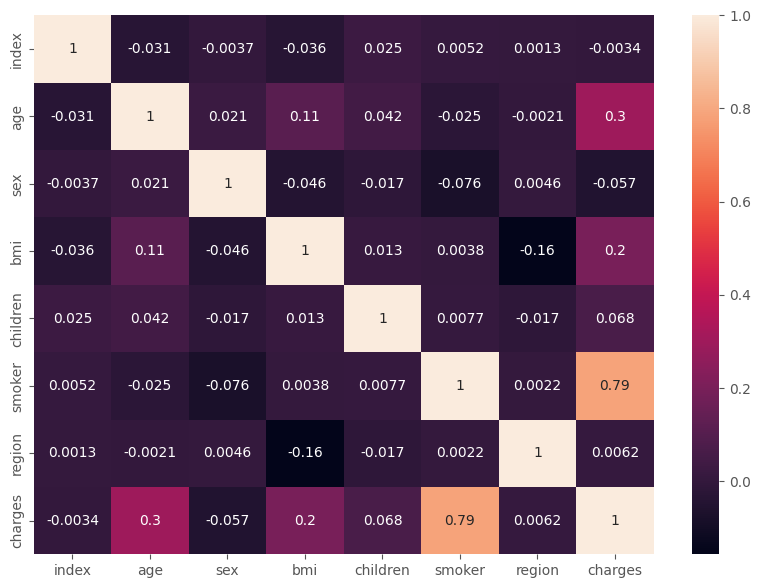

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(p,annot=True)

In [35]:
X = pofic.drop(['charges', 'sex'], axis=1)
y = pofic.charges

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 6)
X_test shape:  (402, 6)
y_train shpae:  (936,)
y_test shape:  (402,)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [39]:
linreg = LinearRegression()

In [52]:
pofic.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [41]:
print(X_train.isnull().sum())  # Shows the count of missing values per column
print(X_test.isnull().sum())   # Check for missing values in the test data

index       0
age         0
bmi         0
children    0
smoker      0
region      0
dtype: int64
index       0
age         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [42]:
pofic.sex.fillna("Unknown", inplace=True)
pofic.smoker.fillna("Unknown", inplace=True)
pofic.region.fillna("Unknown", inplace=True)

In [44]:
from sklearn.impute import SimpleImputer

# Create an imputer with the desired strategy (mean, median, most_frequent, etc.)
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'

# Fit the imputer on the training data and transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now fit the linear regression model on the imputed data
linreg.fit(X_train_imputed, y_train)
pred = linreg.predict(X_test_imputed)


In [45]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Use a regressor that can handle missing values directly
hgb_reg = HistGradientBoostingRegressor()
hgb_reg.fit(X_train, y_train)
pred = hgb_reg.predict(X_test)

In [46]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [47]:
from sklearn.metrics import r2_score

In [48]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7685339680550599


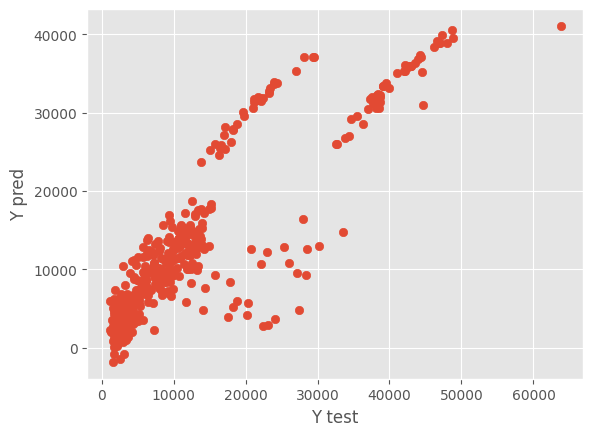

In [49]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [50]:
data = { 'index' :1, 'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2 }
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,index,age,bmi,children,smoker,region
0,1,50,25,2,1,2


In [51]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [32796.70388567]


# Conclusion
In conclusion, our project on predicting health insurance charges has highlighted the intricate relationship between various personal and demographic factors and the resulting healthcare costs. By analyzing key variables such as age, gender, medical history, lifestyle choices, and geographic location, we have developed a robust model that not only estimates annual healthcare expenses but also offers insights into the underlying trends affecting these costs.

The findings underscore the importance of a comprehensive understanding of individual risk profiles when it comes to health insurance pricing. As healthcare costs continue to rise, insurers and policymakers can leverage our predictive model to create more equitable and tailored insurance plans. This can lead to better resource allocation, improved patient outcomes, and ultimately, a more sustainable healthcare system.

Future work could explore the integration of additional factors such as socioeconomic status and environmental influences to refine our predictions further. By continuously updating our model with real-world data, we can enhance its accuracy and applicability, paving the way for informed decision-making in health insurance and healthcare delivery.

Overall, this project not only serves as a valuable tool for stakeholders in the health insurance industry but also contributes to a greater understanding of how personal choices and circumstances impact healthcare costs.